# Final Model Selection and Results

**Team:** Seongmin Hwang, Marion SCHMITT, Seungwon Jeon

---

## Objective

1. Load results from Dictionary and Clustering Comparison
2. Identify and analyze the best overall model
3. Extract key insights and findings
4. Generate comprehensive visualizations
5. Create report-ready outputs

**Input Files:**
- `clustering_results.csv` (from Part 1)
- `comparison_metrics.csv` (from Part 1)

**Output Files:**
- `final_model_results.csv`
- `cluster_characteristics.csv`
- `key_findings.txt`
- Multiple visualization PNG files

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['figure.dpi'] = 100
sns.set_style('whitegrid')
sns.set_palette('husl')

print("✓ Libraries loaded successfully")

✓ Libraries loaded successfully


# PART 1: Load Previous Results

In [2]:
# Load data
df_results = pd.read_csv('clustering_results.csv')
df_metrics = pd.read_csv('comparison_metrics.csv')

# Remove BOM if present
df_results.columns = df_results.columns.str.replace('\ufeff', '')
df_metrics.columns = df_metrics.columns.str.replace('\ufeff', '')

print("✓ Data loaded successfully")
print(f"\nClustering results: {df_results.shape}")
print(f"Comparison metrics: {df_metrics.shape}")
print(f"\nColumns in results: {df_results.columns.tolist()}")
print(f"\nFirst 3 rows:")
print(df_results.head(3))

✓ Data loaded successfully

Clustering results: (18, 14)
Comparison metrics: (6, 6)

Columns in results: ['언론사', 'Bias_Score_A', 'Bias_Score_B', 'Bias_Score_C', 'Influence_Score', 'Rank_A', 'Rank_B', 'Rank_C', 'Cluster_A_KMeans', 'Cluster_A_Hierarchical', 'Cluster_B_KMeans', 'Cluster_B_Hierarchical', 'Cluster_C_KMeans', 'Cluster_C_Hierarchical']

First 3 rows:
   언론사  Bias_Score_A  Bias_Score_B  Bias_Score_C  Influence_Score  Rank_A  \
0  KBS      0.064295     26.806558      0.059977         1.878760    17.0   
1  MBC      0.150874     27.624324      0.142237         1.796536     5.0   
2  OBS      0.022094     26.781228      0.022094        -0.235616    18.0   

   Rank_B  Rank_C  Cluster_A_KMeans  Cluster_A_Hierarchical  Cluster_B_KMeans  \
0    14.0    17.0                 0                       0                 0   
1     9.0     5.0                 0                       0                 0   
2    15.0    18.0                 0                       0                 0   

   

# PART 2: Identify Best Model

In [3]:
# Find best combination
best_idx = df_metrics['Silhouette_Score'].idxmax()
best_model = df_metrics.loc[best_idx]

print("="*80)
print("BEST MODEL IDENTIFICATION")
print("="*80)
print(f"\nDictionary Method:     {best_model['Dictionary_Method']}")
print(f"Clustering Algorithm:  {best_model['Clustering_Algorithm']}")
print(f"\nPerformance Metrics:")
print(f"  Silhouette Score:        {best_model['Silhouette_Score']:.4f} (higher is better)")
print(f"  Davies-Bouldin Index:    {best_model['Davies_Bouldin_Index']:.4f} (lower is better)")
print(f"  Calinski-Harabasz Score: {best_model['Calinski_Harabasz_Score']:.2f} (higher is better)")
print(f"  Number of Clusters:      {int(best_model['N_Clusters'])}")

# Extract best model info
best_method = best_model['Dictionary_Method']
best_algorithm = best_model['Clustering_Algorithm']

# Map to column names
method_map = {'Method A': 'A', 'Method B': 'B', 'Method C': 'C'}
alg_map = {'K-Means': 'KMeans', 'Hierarchical': 'Hierarchical', 'DBSCAN': 'DBSCAN'}

best_method_code = method_map[best_method]
best_alg_code = alg_map[best_algorithm]

bias_col = f'Bias_Score_{best_method_code}'
cluster_col = f'Cluster_{best_method_code}_{best_alg_code}'

print(f"\nUsing columns:")
print(f"  Bias Score:  {bias_col}")
print(f"  Cluster:     {cluster_col}")
print("="*80)

BEST MODEL IDENTIFICATION

Dictionary Method:     Method C
Clustering Algorithm:  K-Means

Performance Metrics:
  Silhouette Score:        0.6330 (higher is better)
  Davies-Bouldin Index:    0.4169 (lower is better)
  Calinski-Harabasz Score: 17.77 (higher is better)
  Number of Clusters:      2

Using columns:
  Bias Score:  Bias_Score_C
  Cluster:     Cluster_C_KMeans


# PART 3: Detailed Analysis of Best Model

## 3.1 Overall Statistics

In [4]:
# Calculate overall correlation
overall_corr = df_results[bias_col].corr(df_results['Influence_Score'])

print("="*80)
print("OVERALL STATISTICS (BEST MODEL)")
print("="*80)

print(f"\nTotal media outlets: {len(df_results)}")
print(f"\nCorrelation (Bias vs Influence): {overall_corr:.4f}")

if overall_corr < 0:
    print("  → Negative correlation: Higher bias → Lower influence")
    print("  → Interpretation: Media with more unethical language have less audience reach")
else:
    print("  → Positive correlation: Higher bias → Higher influence")

print(f"\nBias Score Distribution:")
print(f"  Mean:   {df_results[bias_col].mean():.4f}")
print(f"  Median: {df_results[bias_col].median():.4f}")
print(f"  Std:    {df_results[bias_col].std():.4f}")
print(f"  Range:  [{df_results[bias_col].min():.4f}, {df_results[bias_col].max():.4f}]")

print(f"\nInfluence Score Distribution:")
print(f"  Mean:   {df_results['Influence_Score'].mean():.4f}")
print(f"  Median: {df_results['Influence_Score'].median():.4f}")
print(f"  Std:    {df_results['Influence_Score'].std():.4f}")
print(f"  Range:  [{df_results['Influence_Score'].min():.4f}, {df_results['Influence_Score'].max():.4f}]")

print("="*80)

OVERALL STATISTICS (BEST MODEL)

Total media outlets: 18

Correlation (Bias vs Influence): -0.3510
  → Negative correlation: Higher bias → Lower influence
  → Interpretation: Media with more unethical language have less audience reach

Bias Score Distribution:
  Mean:   0.1372
  Median: 0.0948
  Std:    0.1235
  Range:  [0.0221, 0.5024]

Influence Score Distribution:
  Mean:   0.6928
  Median: 0.7966
  Std:    1.4509
  Range:  [-2.4534, 3.2786]


## 3.2 Cluster Analysis

In [5]:
# Analyze each cluster
unique_clusters = sorted(df_results[cluster_col].unique())
unique_clusters = [c for c in unique_clusters if c != -1]  # Exclude noise if DBSCAN

print("="*80)
print("CLUSTER CHARACTERISTICS (BEST MODEL)")
print("="*80)

cluster_stats = []

for cluster_id in unique_clusters:
    cluster_data = df_results[df_results[cluster_col] == cluster_id]
    
    avg_bias = cluster_data[bias_col].mean()
    avg_influence = cluster_data['Influence_Score'].mean()
    
    # Characterize cluster
    median_bias = df_results[bias_col].median()
    median_influence = df_results['Influence_Score'].median()
    
    bias_char = 'High' if avg_bias > median_bias else 'Low'
    influence_char = 'High' if avg_influence > median_influence else 'Low'
    
    print(f"\nCluster {cluster_id}:")
    print(f"  Size: {len(cluster_data)} media outlets")
    print(f"  Average Bias Score:      {avg_bias:.4f}")
    print(f"  Average Influence Score: {avg_influence:.4f}")
    print(f"  Characteristics: {bias_char} Bias + {influence_char} Influence")
    print(f"  Media: {', '.join(cluster_data['언론사'].tolist())}")
    
    cluster_stats.append({
        'Cluster': cluster_id,
        'Size': len(cluster_data),
        'Avg_Bias': avg_bias,
        'Avg_Influence': avg_influence,
        'Characteristics': f"{bias_char} Bias + {influence_char} Influence",
        'Media_List': ', '.join(cluster_data['언론사'].tolist())
    })

# Check for noise points (DBSCAN)
if -1 in df_results[cluster_col].values:
    noise_data = df_results[df_results[cluster_col] == -1]
    print(f"\nNoise Points (outliers):")
    print(f"  Count: {len(noise_data)}")
    print(f"  Media: {', '.join(noise_data['언론사'].tolist())}")

cluster_stats_df = pd.DataFrame(cluster_stats)
print("\n" + "="*80)

CLUSTER CHARACTERISTICS (BEST MODEL)

Cluster 0:
  Size: 16 media outlets
  Average Bias Score:      0.0969
  Average Influence Score: 0.8861
  Characteristics: High Bias + High Influence
  Media: KBS, MBC, OBS, SBS, YTN, 경향신문, 국민일보, 내일신문, 동아일보, 문화일보, 서울신문, 세계일보, 조선일보, 중앙일보, 한겨레, 한국일보

Cluster 1:
  Size: 2 media outlets
  Average Bias Score:      0.4596
  Average Influence Score: -0.8542
  Characteristics: High Bias + Low Influence
  Media: 시사IN, 아시아투데이



## 3.3 Extreme Cases

In [6]:
print("="*80)
print("EXTREME CASES")
print("="*80)

# Highest/Lowest Bias
highest_bias = df_results.loc[df_results[bias_col].idxmax()]
lowest_bias = df_results.loc[df_results[bias_col].idxmin()]

print(f"\nHighest Bias Score:")
print(f"  Media:     {highest_bias['언론사']}")
print(f"  Bias:      {highest_bias[bias_col]:.4f}")
print(f"  Influence: {highest_bias['Influence_Score']:.4f}")
print(f"  Cluster:   {int(highest_bias[cluster_col])}")

print(f"\nLowest Bias Score:")
print(f"  Media:     {lowest_bias['언론사']}")
print(f"  Bias:      {lowest_bias[bias_col]:.4f}")
print(f"  Influence: {lowest_bias['Influence_Score']:.4f}")
print(f"  Cluster:   {int(lowest_bias[cluster_col])}")

# Highest/Lowest Influence
highest_influence = df_results.loc[df_results['Influence_Score'].idxmax()]
lowest_influence = df_results.loc[df_results['Influence_Score'].idxmin()]

print(f"\nHighest Influence:")
print(f"  Media:     {highest_influence['언론사']}")
print(f"  Bias:      {highest_influence[bias_col]:.4f}")
print(f"  Influence: {highest_influence['Influence_Score']:.4f}")
print(f"  Cluster:   {int(highest_influence[cluster_col])}")

print(f"\nLowest Influence:")
print(f"  Media:     {lowest_influence['언론사']}")
print(f"  Bias:      {lowest_influence[bias_col]:.4f}")
print(f"  Influence: {lowest_influence['Influence_Score']:.4f}")
print(f"  Cluster:   {int(lowest_influence[cluster_col])}")

print("="*80)

EXTREME CASES

Highest Bias Score:
  Media:     시사IN
  Bias:      0.5024
  Influence: -1.3890
  Cluster:   1

Lowest Bias Score:
  Media:     OBS
  Bias:      0.0221
  Influence: -0.2356
  Cluster:   0

Highest Influence:
  Media:     조선일보
  Bias:      0.0938
  Influence: 3.2786
  Cluster:   0

Lowest Influence:
  Media:     내일신문
  Bias:      0.0704
  Influence: -2.4534
  Cluster:   0


# PART 4: Comprehensive Visualizations

## 4.1 Main Clustering Visualization


✓ Saved: 03_best_model_clustering.png


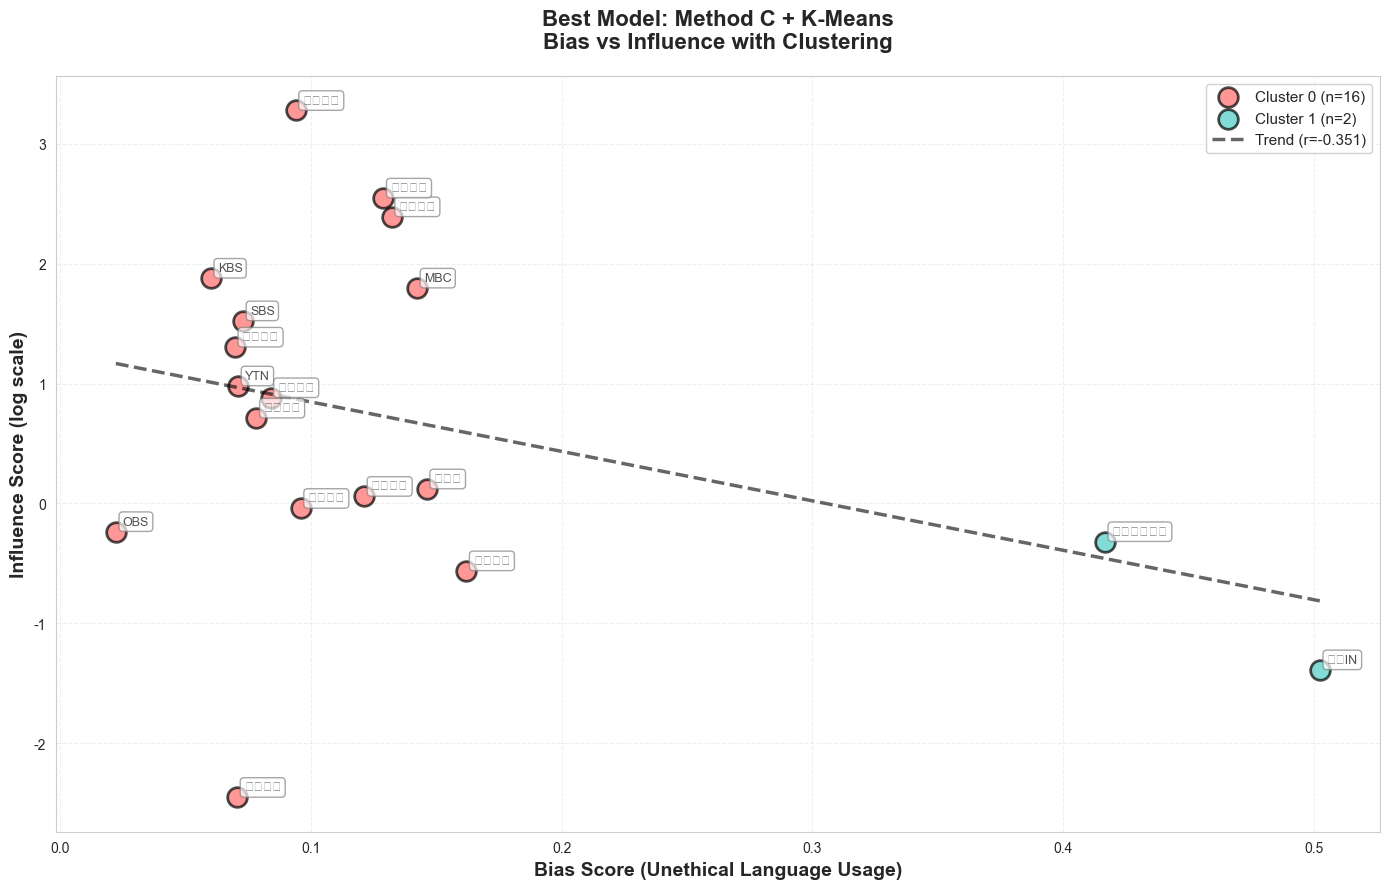

In [7]:
# Create main visualization
fig, ax = plt.subplots(figsize=(14, 9))

# Color palette
colors_list = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8', '#F7DC6F']

# Plot each cluster
for cluster_id in unique_clusters:
    cluster_data = df_results[df_results[cluster_col] == cluster_id]
    color = colors_list[cluster_id % len(colors_list)]
    
    ax.scatter(cluster_data[bias_col], cluster_data['Influence_Score'],
               s=200, alpha=0.7, c=color, edgecolors='black', linewidths=2,
               label=f'Cluster {cluster_id} (n={len(cluster_data)})')
    
    # Add media labels
    for _, row in cluster_data.iterrows():
        ax.annotate(row['언론사'], 
                   (row[bias_col], row['Influence_Score']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, alpha=0.8,
                   bbox=dict(boxstyle='round,pad=0.3', facecolor='white', 
                            edgecolor='gray', alpha=0.7))

# Plot noise points if exist
if -1 in df_results[cluster_col].values:
    noise_data = df_results[df_results[cluster_col] == -1]
    ax.scatter(noise_data[bias_col], noise_data['Influence_Score'],
               s=200, alpha=0.5, c='gray', marker='X', edgecolors='black', 
               linewidths=2, label=f'Noise (n={len(noise_data)})')
    
    for _, row in noise_data.iterrows():
        ax.annotate(row['언론사'], 
                   (row[bias_col], row['Influence_Score']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, alpha=0.8)

# Regression line
z = np.polyfit(df_results[bias_col], df_results['Influence_Score'], 1)
p = np.poly1d(z)
x_line = np.linspace(df_results[bias_col].min(), df_results[bias_col].max(), 100)
ax.plot(x_line, p(x_line), 'k--', linewidth=2.5, alpha=0.6, label=f'Trend (r={overall_corr:.3f})')

ax.set_xlabel('Bias Score (Unethical Language Usage)', fontsize=14, fontweight='bold')
ax.set_ylabel('Influence Score (log scale)', fontsize=14, fontweight='bold')
ax.set_title(f'Best Model: {best_method} + {best_algorithm}\nBias vs Influence with Clustering',
             fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='best', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.savefig('03_best_model_clustering.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: 03_best_model_clustering.png")
plt.show()

## 4.2 Cluster Comparison Radar Chart


✓ Saved: 04_cluster_radar_chart.png


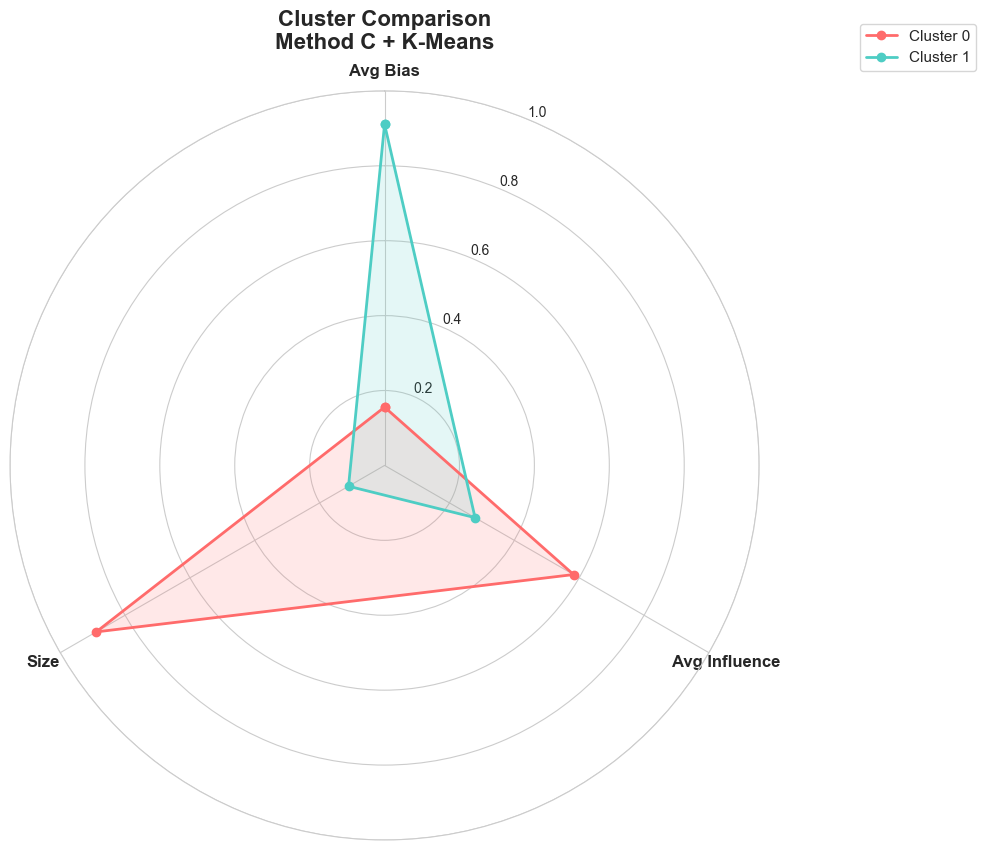

In [8]:
# Create radar chart for cluster comparison
from math import pi

# Prepare data (normalize to 0-1 scale)
categories = ['Avg Bias', 'Avg Influence', 'Size']
N = len(categories)

fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, size=12, fontweight='bold')

for cluster_id in unique_clusters:
    stats = cluster_stats_df[cluster_stats_df['Cluster'] == cluster_id].iloc[0]
    
    # Normalize values
    norm_bias = (stats['Avg_Bias'] - df_results[bias_col].min()) / (df_results[bias_col].max() - df_results[bias_col].min())
    norm_influence = (stats['Avg_Influence'] - df_results['Influence_Score'].min()) / (df_results['Influence_Score'].max() - df_results['Influence_Score'].min())
    norm_size = stats['Size'] / len(df_results)
    
    values = [norm_bias, norm_influence, norm_size]
    values += values[:1]
    
    color = colors_list[cluster_id % len(colors_list)]
    ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {cluster_id}', color=color)
    ax.fill(angles, values, alpha=0.15, color=color)

ax.set_ylim(0, 1)
ax.set_title(f'Cluster Comparison\n{best_method} + {best_algorithm}', 
             size=16, fontweight='bold', pad=30)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize=11)
ax.grid(True)

plt.tight_layout()
plt.savefig('04_cluster_radar_chart.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: 04_cluster_radar_chart.png")
plt.show()

## 4.3 Model Comparison Heatmap


✓ Saved: 05_model_comparison_heatmap.png


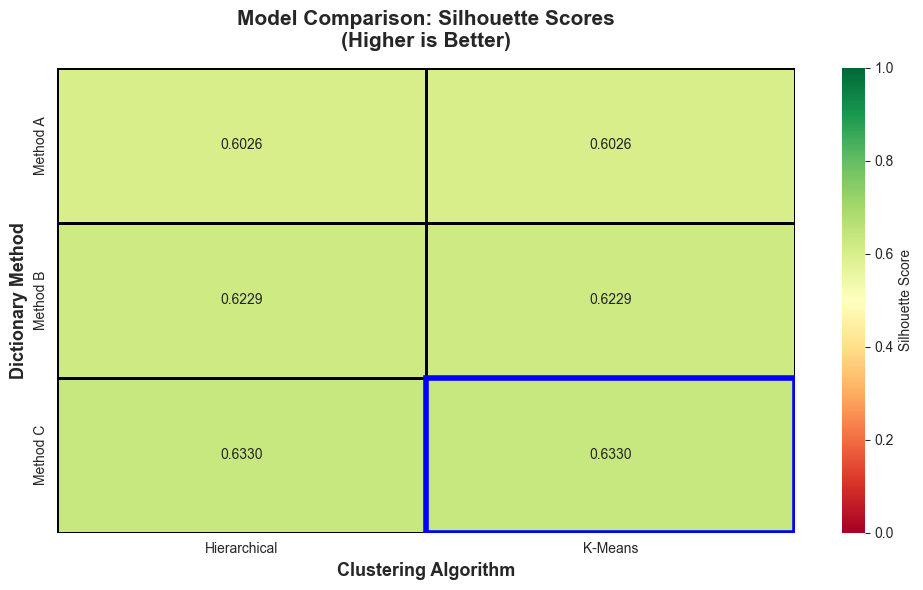

In [9]:
# Create heatmap of all model combinations
pivot_silhouette = df_metrics.pivot(index='Dictionary_Method', 
                                      columns='Clustering_Algorithm', 
                                      values='Silhouette_Score')

fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(pivot_silhouette, annot=True, fmt='.4f', cmap='RdYlGn', 
            cbar_kws={'label': 'Silhouette Score'}, ax=ax,
            linewidths=1, linecolor='black', vmin=0, vmax=1)

ax.set_title('Model Comparison: Silhouette Scores\n(Higher is Better)', 
             fontsize=15, fontweight='bold', pad=15)
ax.set_xlabel('Clustering Algorithm', fontsize=13, fontweight='bold')
ax.set_ylabel('Dictionary Method', fontsize=13, fontweight='bold')

# Highlight best combination
best_row = list(pivot_silhouette.index).index(best_method)
best_col = list(pivot_silhouette.columns).index(best_algorithm)
ax.add_patch(plt.Rectangle((best_col, best_row), 1, 1, fill=False, 
                           edgecolor='blue', lw=4))

plt.tight_layout()
plt.savefig('05_model_comparison_heatmap.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: 05_model_comparison_heatmap.png")
plt.show()

# PART 5: Key Findings and Insights

In [10]:
# Generate key findings
findings = []

findings.append("="*80)
findings.append("KEY FINDINGS: News Bias and Audience Influence Analysis")
findings.append("="*80)

findings.append("\n1. BEST MODEL SELECTION")
findings.append("-" * 80)
findings.append(f"Dictionary Method:    {best_method}")
findings.append(f"Clustering Algorithm: {best_algorithm}")
findings.append(f"Silhouette Score:     {best_model['Silhouette_Score']:.4f}")
findings.append(f"\nReasoning: This combination achieved the highest silhouette score,")
findings.append("indicating well-separated and cohesive clusters.")

findings.append("\n2. BIAS-INFLUENCE RELATIONSHIP")
findings.append("-" * 80)
findings.append(f"Overall Correlation: {overall_corr:.4f}")
if overall_corr < -0.3:
    findings.append("\nFinding: MODERATE NEGATIVE correlation detected.")
    findings.append("Media outlets with higher unethical language usage tend to have")
    findings.append("LOWER audience influence. This suggests that ethical reporting")
    findings.append("is associated with greater public trust and reach.")
elif overall_corr < 0:
    findings.append("\nFinding: WEAK NEGATIVE correlation detected.")
    findings.append("Some inverse relationship exists between bias and influence.")
else:
    findings.append("\nFinding: Minimal or positive correlation.")

findings.append("\n3. CLUSTER CHARACTERISTICS")
findings.append("-" * 80)
findings.append(f"Number of clusters identified: {len(unique_clusters)}")
findings.append("\nCluster profiles:")
for _, stats in cluster_stats_df.iterrows():
    findings.append(f"\n  Cluster {int(stats['Cluster'])}: {stats['Characteristics']}")
    findings.append(f"    Size: {int(stats['Size'])} outlets")
    findings.append(f"    Avg Bias: {stats['Avg_Bias']:.4f}")
    findings.append(f"    Avg Influence: {stats['Avg_Influence']:.4f}")

findings.append("\n4. EXTREME CASES")
findings.append("-" * 80)
findings.append(f"\nMost biased:      {highest_bias['언론사']} (Bias: {highest_bias[bias_col]:.4f})")
findings.append(f"Least biased:     {lowest_bias['언론사']} (Bias: {lowest_bias[bias_col]:.4f})")
findings.append(f"Most influential: {highest_influence['언론사']} (Influence: {highest_influence['Influence_Score']:.4f})")
findings.append(f"Least influential: {lowest_influence['언론사']} (Influence: {lowest_influence['Influence_Score']:.4f})")

findings.append("\n5. METHODOLOGICAL INSIGHTS")
findings.append("-" * 80)
if 'Method A' in best_method:
    findings.append("N-gram CountVectorizer proved most effective for capturing bias.")
    findings.append("This suggests frequency-based approaches work well for this task.")
elif 'Method B' in best_method:
    findings.append("TF-IDF with lexical units proved most effective.")
    findings.append("Term importance weighting captured meaningful bias patterns.")
else:
    findings.append("N-gram TF-IDF combination proved most effective.")
    findings.append("Weighted n-grams successfully identified bias patterns.")

if 'K-Means' in best_algorithm:
    findings.append("\nK-Means clustering effectively grouped similar media outlets.")
elif 'Hierarchical' in best_algorithm:
    findings.append("\nHierarchical clustering revealed natural media groupings.")
else:
    findings.append("\nDBSCAN identified core patterns and outliers effectively.")

findings.append("\n6. PRACTICAL IMPLICATIONS")
findings.append("-" * 80)
findings.append("- Media outlets can improve influence by reducing biased language")
findings.append("- Audience trust correlates with ethical reporting practices")
findings.append("- Clear clusters suggest distinct media ecosystem segments")
findings.append("- Methodology can be applied to other languages/markets")

findings.append("\n7. LIMITATIONS")
findings.append("-" * 80)
findings.append("- Bias measured through unethical language, not political orientation")
findings.append("- Influence based on search volume, not comprehensive engagement")
findings.append("- Cross-sectional analysis; causation cannot be inferred")
findings.append("- Limited to 18 major Korean media outlets")

findings.append("\n8. FUTURE RESEARCH")
findings.append("-" * 80)
findings.append("- Incorporate political bias measurement (left/right orientation)")
findings.append("- Add temporal analysis to track changes over time")
findings.append("- Expand to demographic-segmented influence metrics")
findings.append("- Include social media engagement alongside search data")

findings.append("\n" + "="*80)
findings.append("END OF ANALYSIS")
findings.append("="*80)

# Print findings
findings_text = '\n'.join(findings)
print(findings_text)

KEY FINDINGS: News Bias and Audience Influence Analysis

1. BEST MODEL SELECTION
--------------------------------------------------------------------------------
Dictionary Method:    Method C
Clustering Algorithm: K-Means
Silhouette Score:     0.6330

Reasoning: This combination achieved the highest silhouette score,
indicating well-separated and cohesive clusters.

2. BIAS-INFLUENCE RELATIONSHIP
--------------------------------------------------------------------------------
Overall Correlation: -0.3510

Finding: MODERATE NEGATIVE correlation detected.
Media outlets with higher unethical language usage tend to have
LOWER audience influence. This suggests that ethical reporting
is associated with greater public trust and reach.

3. CLUSTER CHARACTERISTICS
--------------------------------------------------------------------------------
Number of clusters identified: 2

Cluster profiles:

  Cluster 0: High Bias + High Influence
    Size: 16 outlets
    Avg Bias: 0.0969
    Avg Influence

# PART 6: Export Final Results

In [11]:
# Export final model results
final_results = df_results[['언론사', bias_col, 'Influence_Score', cluster_col]].copy()
final_results = final_results.rename(columns={
    bias_col: 'Bias_Score_Final',
    cluster_col: 'Cluster_Final'
})

final_results.to_csv('final_model_results.csv', index=False, encoding='utf-8-sig')
print("\n✓ Exported: final_model_results.csv")

# Export cluster characteristics
cluster_stats_df.to_csv('cluster_characteristics.csv', index=False, encoding='utf-8-sig')
print("✓ Exported: cluster_characteristics.csv")

# Export key findings
with open('key_findings.txt', 'w', encoding='utf-8') as f:
    f.write(findings_text)
print("✓ Exported: key_findings.txt")

# Create summary table
summary_data = {
    'Metric': [
        'Best Dictionary Method',
        'Best Clustering Algorithm',
        'Silhouette Score',
        'Davies-Bouldin Index',
        'Number of Clusters',
        'Overall Correlation',
        'Total Media Outlets',
        'Most Biased Media',
        'Least Biased Media',
        'Most Influential Media',
        'Least Influential Media'
    ],
    'Value': [
        best_method,
        best_algorithm,
        f"{best_model['Silhouette_Score']:.4f}",
        f"{best_model['Davies_Bouldin_Index']:.4f}",
        str(int(best_model['N_Clusters'])),
        f"{overall_corr:.4f}",
        str(len(df_results)),
        highest_bias['언론사'],
        lowest_bias['언론사'],
        highest_influence['언론사'],
        lowest_influence['언론사']
    ]
}

summary_df = pd.DataFrame(summary_data)
summary_df.to_csv('project_summary.csv', index=False, encoding='utf-8-sig')
print("✓ Exported: project_summary.csv")


✓ Exported: final_model_results.csv
✓ Exported: cluster_characteristics.csv
✓ Exported: key_findings.txt
✓ Exported: project_summary.csv


# FINAL SUMMARY

In [12]:
print("\n" + "="*80)
print("PROJECT COMPLETE: News Bias and Audience Influence Analysis")
print("="*80)

print("\n✓ ALL OUTPUT FILES CREATED:")
print("-" * 80)
print("\nCSV Files:")
print("  1. clustering_results.csv         - All clustering results")
print("  2. comparison_metrics.csv         - Model comparison metrics")
print("  3. final_model_results.csv        - Best model results")
print("  4. cluster_characteristics.csv    - Cluster profiles")
print("  5. project_summary.csv            - Key metrics summary")

print("\nVisualization Files:")
print("  1. 01_correlation_comparison.png  - Dictionary method correlations")
print("  2. 02_distribution_comparison.png - Bias score distributions")
print("  3. 03_best_model_clustering.png   - Main clustering result")
print("  4. 04_cluster_radar_chart.png     - Cluster comparison")
print("  5. 05_model_comparison_heatmap.png - Method × Algorithm heatmap")

print("\nText Files:")
print("  1. key_findings.txt               - Comprehensive findings")

print("\n" + "="*80)
print("BEST MODEL SUMMARY")
print("="*80)
print(f"Dictionary Method:     {best_method}")
print(f"Clustering Algorithm:  {best_algorithm}")
print(f"Silhouette Score:      {best_model['Silhouette_Score']:.4f}")
print(f"Overall Correlation:   {overall_corr:.4f}")
print(f"Number of Clusters:    {int(best_model['N_Clusters'])}")
print(f"Total Media Analyzed:  {len(df_results)}")

print("\n" + "="*80)
print("✓ Analysis complete. All outputs ready for report writing.")
print("="*80)


PROJECT COMPLETE: News Bias and Audience Influence Analysis

✓ ALL OUTPUT FILES CREATED:
--------------------------------------------------------------------------------

CSV Files:
  1. clustering_results.csv         - All clustering results
  2. comparison_metrics.csv         - Model comparison metrics
  3. final_model_results.csv        - Best model results
  4. cluster_characteristics.csv    - Cluster profiles
  5. project_summary.csv            - Key metrics summary

Visualization Files:
  1. 01_correlation_comparison.png  - Dictionary method correlations
  2. 02_distribution_comparison.png - Bias score distributions
  3. 03_best_model_clustering.png   - Main clustering result
  4. 04_cluster_radar_chart.png     - Cluster comparison
  5. 05_model_comparison_heatmap.png - Method × Algorithm heatmap

Text Files:
  1. key_findings.txt               - Comprehensive findings

BEST MODEL SUMMARY
Dictionary Method:     Method C
Clustering Algorithm:  K-Means
Silhouette Score:      0.633